# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier

# 0.1 Load Dataset

In [2]:
#Data Path
data_path_X_trian = '../classificacao/X_training.csv'
data_path_y_trian = '../classificacao/y_training.csv'

data_path_X_val = '../classificacao/X_validation.csv'
data_path_y_val = '../classificacao/y_validation.csv'

data_path_X_test = '../classificacao/X_test.csv'
data_path_y_test = '../classificacao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

In [3]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 Performance

## 2.1 Train Performance

In [4]:
# Define Model
RandomForest = RandomForestClassifier(random_state=42)

# Training 
RandomForest.fit( X_train, y_train ) 

# Predict
y_pred_train = RandomForest.predict( X_train )

# Performance Metrics
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
precision_train = mt.precision_score(y_train, y_pred_train)
recall_train = mt.recall_score(y_train, y_pred_train)
f1_score_train = mt.f1_score(y_train, y_pred_train)

print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_score_train}")

Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0


## 2.2 Validation Performance

In [6]:
# Define Model
RandomForest = RandomForestClassifier(random_state=42)

# Training 
RandomForest.fit( X_train, y_train ) 

# Predict
y_pred_val = RandomForest.predict( X_val )

# Performance Metrics
accuracy_val = mt.accuracy_score(y_val, y_pred_val)
precision_val = mt.precision_score(y_val, y_pred_val)
recall_val = mt.recall_score(y_val, y_pred_val)
f1_score_val = mt.f1_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_score_val}")

Validation Accuracy: 0.9652176710962386
Validation Precision: 0.9741999693768183
Validation Recall: 0.9447620461801173
Validation F1 Score: 0.9592552108853795


## 2.3 Fine Tunning

### n_estimators

In [8]:
n_estimators = np.arange(10, 310, 10)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [9]:
for i in n_estimators:
    # Train Model
    RandomForest = RandomForestClassifier( n_estimators=i, random_state=42 )
    RandomForest.fit( X_train, y_train )

    # Predict
    y_pred = RandomForest.predict( X_val )

    # Performance Metrics

    accuracy = mt.accuracy_score(y_val, y_pred)
    precision = mt.precision_score(y_val, y_pred)
    recall = mt.recall_score(y_val, y_pred)
    f1_score = mt.f1_score(y_val, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

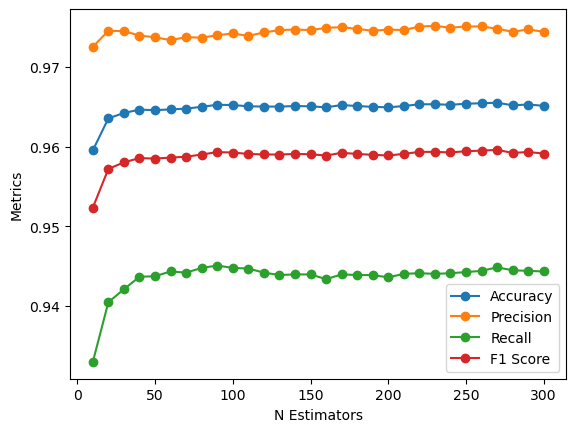

In [10]:
plt.plot(n_estimators, accuracy_list, marker="o", label="Accuracy")
plt.plot(n_estimators, precision_list, marker="o", label="Precision")
plt.plot(n_estimators, recall_list, marker="o", label="Recall")
plt.plot(n_estimators, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("N Estimators")
plt.ylabel("Metrics")
plt.legend()

In [15]:
best_estimator = n_estimators[np.argmax( accuracy_list ) ]
best_estimator

270

### max_depth

In [16]:
max_depth = np.arange(1, 51, 1)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [18]:
for j in max_depth:
    #Train Model
    RandomForest = RandomForestClassifier( max_depth=j, random_state=42 )
    #Training
    RandomForest.fit( X_train, y_train )
    #Predict 
    y_pred = RandomForest.predict( X_val )

    # Performance Metrics
    accuracy = mt.accuracy_score(y_val, y_pred)
    precision = mt.precision_score(y_val, y_pred)
    recall = mt.recall_score(y_val, y_pred)
    f1_score = mt.f1_score(y_val , y_pred)

    accuracy_list.append(accuracy)
    precision_list.append( precision )
    recall_list.append( recall )
    f1_score_list.append( f1_score)

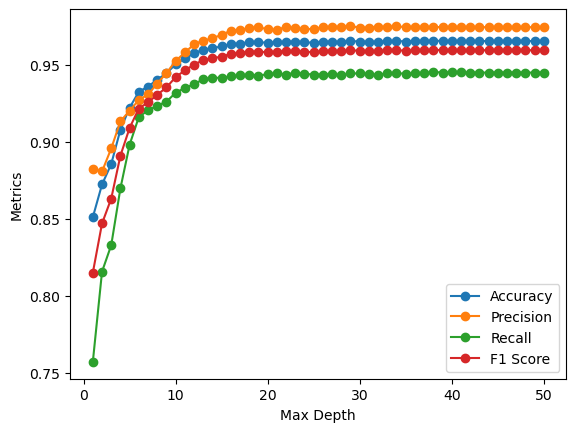

In [19]:
plt.plot(max_depth, accuracy_list, marker="o", label="Accuracy")
plt.plot(max_depth, precision_list, marker="o", label="Precision")
plt.plot(max_depth, recall_list, marker="o", label="Recall")
plt.plot(max_depth, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

In [21]:
best_max_depth = max_depth[np.argmax( accuracy_list )]
best_max_depth

38

## 2.4 Test Performance

In [22]:
#Define Model
RandomForest = RandomForestClassifier( max_depth=best_max_depth, n_estimators=best_estimator )

#Fit Model
RandomForest.fit( pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0) )

#Predict
y_pred_test = RandomForest.predict( X_test )

# Performance Metrics
accuracy_test = mt.accuracy_score(y_test, y_pred_test)
precision_test = mt.precision_score(y_test, y_pred_test)
recall_test = mt.recall_score(y_test, y_pred_test)
f1_score_test = mt.f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_score_test}")

Test Accuracy: 0.965627775846754
Test Precision: 0.9741964689904934
Test Recall: 0.9467663880334359
Test F1 Score: 0.9602855867916108


# 3.0 Results

In [23]:
train_metrics = {
    "Algorithm": "Random Forest",
    "Accuracy": np.round(accuracy_train, 3),
    "Precision": np.round(precision_train, 3),
    "Recall": np.round(recall_train, 3),
    "F1 Score": np.round(f1_score_train, 3),
}
validation_metrics = {
    "Algorithm": "Random Forest",
    "Accuracy": np.round(accuracy_val, 3),
    "Precision": np.round(precision_val, 3),
    "Recall": np.round(recall_val, 3),
    "F1 Score": np.round(f1_score_val, 3),
}
test_metrics = {
    "Algorithm": "Random Forest",
    "Accuracy": np.round(accuracy_test, 3),
    "Precision": np.round(precision_test, 3),
    "Recall": np.round(recall_test, 3),
    "F1 Score": np.round(f1_score_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./test_metrics.csv", mode="a", header=False
)